

## <div style="text-align: center"> Webscraping in Twitter and Quick Visualization in Workcloud

### Table of contents

#### [1. Authorization credentials to use Twitter's Api](#a)
#### [2. Defining our search](#b)
#### [3. Creating a dataframe ](#c)
#### [4. Saving the file](#d)
#### [5. Quick visualization in Workloud ](#e)




- **Please upvote the noteebook if you like it :)**

This notebook is a quick guide on how webscraping works in python.


1. You must apply for a Twitter Developer account: https://developer.twitter.com/en

2. Once you set up the account, you need to retrieve your Keys and tokens accesses (as in the picture)


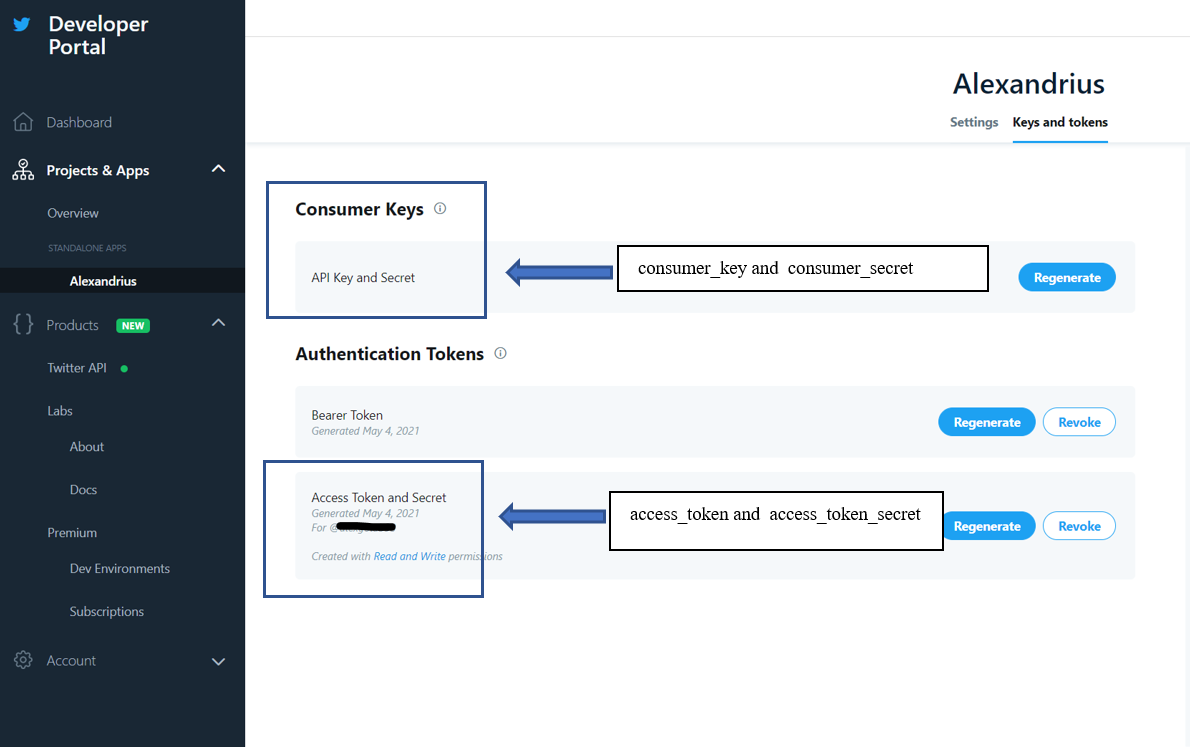

In [ ]:
# ## Libraries
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob
import tweepy
import re
from sklearn.feature_extraction.text import TfidfVectorizer

#### 1. Authorization credentials to use Twitter's Api<a name="a">

In [ ]:
## Authorization credentials to use Twitter's Api
consumer_key = "XXXX"  ##API KEY
consumer_secret = "XXXX" ##API SECRET KEY
access_token ="XXXX"
access_token_secret = "XXXX"

## in the picture above it is described


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#### 2. Defining our search <a name="b">

In [ ]:
# Define the words we want to scrape as well as the date 

search_words = "Adidas","#Adidas" + " -filter:retweets"  #  -filter:retweets: here we are removing all the retweets.
date_since = "2021-01-09"  ## yyyy-mm-dd


# Collect tweets (in this case Twitter allows us to webscrape 2500 tweets every 15 minutes)
Adidas = tweepy.Cursor(api.search,
              q=search_words,
              lang="en").items(2500) #language ='es' for spanish. items = number of tweets you will webscrape.

# Storing the Tweets into a python list
Adidas_tweets = [[tweet.text, tweet.user.location] for tweet in Adidas] 

## Above I have just extracted Tweets Text and User location. There are more options to extract more information such as: 

        # user.friends_count - no. of other users that user is following (following)
        # user.followers_count - no. of other users who are following this user (followers)
        # user.statuses_count - total tweets by user
        # user.created_at - when the user account was created
        # created_at - when the tweet was created
        # retweet_count - no. of retweets



In [ ]:
## Checking addias Tweets 
Adidas_tweets

#### 3. Creating a dataframe <a name="c">

In [ ]:
# Creating a DataFrame 

data = pd.DataFrame(data=Adidas_tweets,  
                    columns=["Tweets", 'location'])

# Cleaning DataFrame creating a function


def cleanText(text):
    text = re.sub(r"(?:\@|https?\://)\S+",'', text)#removing hiperlink and @ mentions
    text = re.sub(r'RT[\s]+', ' ', text) # Removing Retweets
    text = re.sub(r'#', ' ', text) #Removing hastags
    return text

# Applying cleaning text function:

data['Tweets']= data['Tweets'].apply(cleanText)


## checking how it looks

data.head()

#### 4. Saving the file <a name="d">

In [ ]:

## save the file

data.to_csv(r'C:\Users\xxxxxxxxxxxxxxxxxxx\Adidas_Webscraped_Twitter.csv', index = False)
# ## Write the path where you want to save your data 

In [ ]:
## Importing dataset
import pandas as pd
data = pd.read_csv('../input/adidas-data-set-from-twitter/Adidas_Webscraped_Twitter.csv')
data.head()

#### 5. Quick visualization in Workloud <a name="e">

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#Importing Adidas image 
cdproject_logo = np.array(Image.open("../input/adidas-logo/adidas_logo.png")) ##The image you want to see

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(cdproject_logo, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords

allWords = ' '.join([tweets for tweets in data['Tweets']])

# instantiate a word cloud object
wordCloud = WordCloud(background_color='white', max_words=10000, mask=cdproject_logo,contour_width=1, contour_color='black')

# generate the word cloud
wordCloud.generate(allWords)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
allWords = ' '.join([tweets for tweets in data['Tweets']])

stopwords = set(STOPWORDS)
wordCloud = WordCloud(width=500, height=300, random_state =21, max_font_size=119,stopwords=stopwords).generate(allWords)

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

# display the cloud
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### If you want to automatize your code and run it for several times :

This page might help you: https://python.plainenglish.io/scraping-tweets-with-tweepy-python-59413046e788
    
    



 Sentiment analysis will be conducted in future notebooks :) 